# Pizza Sales Analysis- Saba Anjum

In [13]:

#2. 1. identify the time at which we are getting highest orders and the time at which we are getting the lowest orders
#3. total sales
#4. identify which pizza is ordered the most
#5. Identify which pizza is generating more sales
#6. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)
#7. Identify which pizza category is hotselling.




In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [15]:
pizza= pd.read_csv("pizzas.csv")
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [16]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [17]:
p_types=pd.read_csv("pizza_types.csv", encoding="unicode_escape")
p_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [18]:
o_details=pd.read_csv("order_details.csv")
o_details.head(10)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
5,6,2,thai_ckn_l,1
6,7,3,ital_supr_m,1
7,8,3,prsc_argla_l,1
8,9,4,ital_supr_m,1
9,10,5,ital_supr_m,1


In [19]:
o_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
a= o_details["order_id"].unique()
total_people=len(a)
total_people

21350

In [21]:
o_details['order_id'].value_counts()


order_id
18845    21
10760    21
18280    15
21158    15
17464    15
         ..
10351     1
10355     1
10357     1
10360     1
21350     1
Name: count, Length: 21350, dtype: int64

In [22]:
total_pizzas_served= o_details['order_id'].value_counts().sum()
total_pizzas_served

48620

In [23]:
total_pizzas_served/total_people

2.2772833723653396

In [24]:
o_details['quantity'].unique()# four types of pizzas

array([1, 2, 3, 4], dtype=int64)

In [25]:
orders= pd.read_csv("orders.csv")
orders.head(10)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
5,6,2015-01-01,12:29:36
6,7,2015-01-01,12:50:37
7,8,2015-01-01,12:51:37
8,9,2015-01-01,12:52:01
9,10,2015-01-01,13:00:15


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [27]:
orders['date']=pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


In [28]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [29]:
orders['time']=pd.to_datetime(orders['time'])
orders.info()

C:\Users\sabaa\AppData\Local\Temp\ipykernel_16892\1393817163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['time']=pd.to_datetime(orders['time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


orders.head(10)

In [30]:
orders["hours"]=orders["time"].dt.strftime("%H")
orders.head()

,order_id,date,time,hours
0,1,2015-01-01,2023-12-02 11:38:36,11
1,2,2015-01-01,2023-12-02 11:57:40,11
2,3,2015-01-01,2023-12-02 12:12:28,12
3,4,2015-01-01,2023-12-02 12:16:31,12
4,5,2015-01-01,2023-12-02 12:21:30,12


# Total Sales

In [31]:
sales=pd.merge(o_details,pizza,on="pizza_id",how="inner")
sales.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25


In [32]:
sales['amount']=sales['price']*sales['quantity']
sales.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,amount
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25


In [33]:
print("Total Sales is: ", sales['amount'].sum())


Total Sales is:  817860.0499999999


In [34]:
#4. identify which pizza is ordered the most

# Most Ordered Pizza

In [35]:
mop= pd.merge(sales,p_types, on="pizza_type_id", how="inner")
mop.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,amount,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [36]:
gb=mop.groupby("name").agg({"pizza_id":"count"})# we can write order_details_id in place of pizza_id
gb

,pizza_id
name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [37]:
most_orderd=gb['pizza_id'].idxmax()
print("The Most Orderd Pizza is:" , most_orderd)


The Most Orderd Pizza is: The Classic Deluxe Pizza


In [38]:
##5. Identify which pizza is generating more sales

# Hotselling Pizza

In [39]:
gb1=mop.groupby("name").agg({"amount":"sum"})
gb1

,amount
name,
The Barbecue Chicken Pizza,42768.00
The Big Meat Pizza,22968.00
The Brie Carre Pizza,11588.50
The Calabrese Pizza,15934.25
The California Chicken Pizza,41409.50
The Chicken Alfredo Pizza,16900.25
The Chicken Pesto Pizza,16701.75
The Classic Deluxe Pizza,38180.50
The Five Cheese Pizza,26066.50


In [40]:
hotselling=gb1["amount"].idxmax()
print("The Pizza which has been generating the most:" ,hotselling)

The Pizza which has been generating the most: The Thai Chicken Pizza


# Hotselling Category

In [41]:
gb2=mop.groupby("category").agg({"amount":"sum"}) 
gb2

,amount
category,
Chicken,195919.50
Classic,220053.10
Supreme,208197.00
Veggie,193690.45


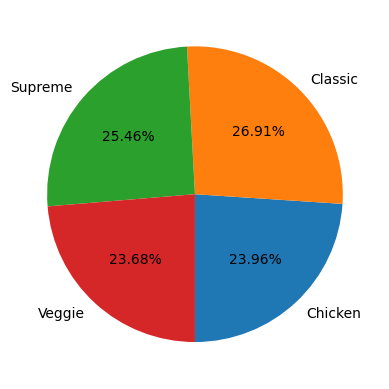

In [42]:
plt.pie(gb2['amount'], labels=gb2.index, autopct="%1.2f%%", startangle=270)
plt.show()

In [43]:
#identify which day of the week we are getting the most orders.

In [ ]:
#  Most Ordered Weekday

In [44]:
orders.head()

,order_id,date,time,hours
0,1,2015-01-01,2023-12-02 11:38:36,11
1,2,2015-01-01,2023-12-02 11:57:40,11
2,3,2015-01-01,2023-12-02 12:12:28,12
3,4,2015-01-01,2023-12-02 12:16:31,12
4,5,2015-01-01,2023-12-02 12:21:30,12


In [45]:
orders['weekday']=orders['date'].dt.strftime("%A")
orders.head()

,order_id,date,time,hours,weekday
0,1,2015-01-01,2023-12-02 11:38:36,11,Thursday
1,2,2015-01-01,2023-12-02 11:57:40,11,Thursday
2,3,2015-01-01,2023-12-02 12:12:28,12,Thursday
3,4,2015-01-01,2023-12-02 12:16:31,12,Thursday
4,5,2015-01-01,2023-12-02 12:21:30,12,Thursday


In [46]:
week= pd.merge(orders, o_details, on="order_id", how="inner")
week.head()

,order_id,date,time,hours,weekday,order_details_id,pizza_id,quantity
0,1,2015-01-01,2023-12-02 11:38:36,11,Thursday,1,hawaiian_m,1
1,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,2,classic_dlx_m,1
2,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,3,five_cheese_l,1
3,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,4,ital_supr_l,1
4,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,5,mexicana_m,1


In [47]:
gb3= week.groupby("weekday").agg({"order_details_id":"count"})
gb3

,order_details_id
weekday,
Friday,8106
Monday,6369
Saturday,7355
Sunday,5917
Thursday,7323
Tuesday,6753
Wednesday,6797


In [48]:
gb3=gb3['order_details_id'].idxmax()
gb3

'Friday'

In [49]:
print("the Weekday on which we are getting the most number of order is:", gb3)

the Weekday on which we are getting the most number of order is: Friday


In [50]:
#1. identify the time at which we are getting high orders and the time at which we are getting the lowest orders

In [51]:
gb4= week.groupby('hours').agg({"order_details_id":"count"})
gb4.index = gb4.index.astype("int")

In [52]:
g=gb4['order_details_id'].idxmax()
g

12

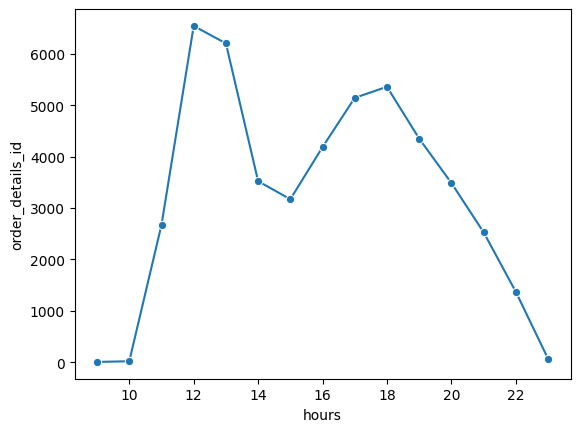

In [53]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot( x=gb4.index, y=gb4['order_details_id'],data=gb4, marker="o")
plt.show()

In [54]:
week['hours']=week['hours'].astype("int")

week.loc[(week["hours"]<12), "day_time"]="morning"
week.loc[(week["hours"]>=12)& (week["hours"]<17), "day_time"]="afternoon"
week.loc[(week["hours"]>=17)& (week["hours"]<21), "day_time"]="evening"
week.loc[(week["hours"]>21), "day_time"]="night"

week.head(10)


C:\Users\sabaa\AppData\Local\Temp\ipykernel_16892\4162844314.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  week.loc[(week["hours"]<12), "day_time"]="morning"


,order_id,date,time,hours,weekday,order_details_id,pizza_id,quantity,day_time
0,1,2015-01-01,2023-12-02 11:38:36,11,Thursday,1,hawaiian_m,1,morning
1,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,2,classic_dlx_m,1,morning
2,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,3,five_cheese_l,1,morning
3,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,4,ital_supr_l,1,morning
4,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,5,mexicana_m,1,morning
5,2,2015-01-01,2023-12-02 11:57:40,11,Thursday,6,thai_ckn_l,1,morning
6,3,2015-01-01,2023-12-02 12:12:28,12,Thursday,7,ital_supr_m,1,afternoon
7,3,2015-01-01,2023-12-02 12:12:28,12,Thursday,8,prsc_argla_l,1,afternoon
8,4,2015-01-01,2023-12-02 12:16:31,12,Thursday,9,ital_supr_m,1,afternoon
9,5,2015-01-01,2023-12-02 12:21:30,12,Thursday,10,ital_supr_m,1,afternoon


In [55]:
gb5= week.groupby("day_time").agg({"order_details_id":"count"})
gb5

,order_details_id
day_time,
afternoon,23622
evening,18339
morning,2693
night,1438


# the most pizza are ordered by- afternoon